In [157]:
# from google.colab import drive
# drive.mount('/content/drive')

# Import Libraries/Dataset


In [158]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
print("packages loaded")
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#mount the drive
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score

packages loaded


# Data Loading

In [159]:
# !mkdir ./data
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data -O ./data/machine_data.csv
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.names -O ./data/machine_names.txt

In [160]:
# Data Definition

   1. vendor name: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
   2. Model Name: many unique symbols
   3. MYCT: machine cycle time in nanoseconds (integer)
   4. MMIN: minimum main memory in kilobytes (integer)
   5. MMAX: maximum main memory in kilobytes (integer)
   6. CACH: cache memory in kilobytes (integer)
   7. CHMIN: minimum channels in units (integer)
   8. CHMAX: maximum channels in units (integer)
   9. PRP: published relative performance (integer)
  10. ERP: estimated relative performance from the original article (integer)




1.   predictive attributes
2.   non-predictive
3.   goal field, and the linear regression's guess



In [161]:

data_path = os.getcwd()
cols = ['vendor_name','Model_Name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']
data = pd.read_csv(data_path + "/machine_data.csv", names=cols, sep=',')

In [162]:
data.head()

,vendor_name,Model_Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


# 1 Data Visualization and Exploration

### 1. Print 2 rows for a sanity check to identify all the features present in the dataset and if the target matches with them.

In [163]:
data.head(2)

,vendor_name,Model_Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253


In [164]:
data.vendor_name.value_counts()

ibm             32
nas             19
ncr             13
sperry          13
honeywell       13
siemens         12
cdc              9
amdahl           9
burroughs        8
hp               7
harris           7
dg               7
dec              6
c.r.d            6
ipl              6
magnuson         6
cambex           5
prime            5
formation        5
perkin-elmer     3
gould            3
nixdorf          3
wang             2
bti              2
basf             2
apollo           2
microdata        1
four-phase       1
sratus           1
adviser          1
Name: vendor_name, dtype: int64

This shows that the data is loaded properly without any blank or empty values

### 2. Comment on class imbalance with the appropriate visualization method.

In [165]:
data.shape

(209, 10)

In [166]:
data.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


For a regression use case, instead of checking the class imbalance lets check the distribution of the target column - PRM . Outliers in either feature variables or target variable  will have a strong influence on the least square estimations. SO lets explore the target column 

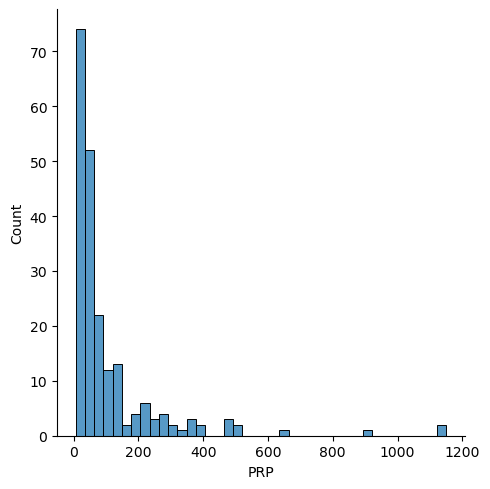

In [167]:
sns.displot(data, x="PRP")
plt.show()

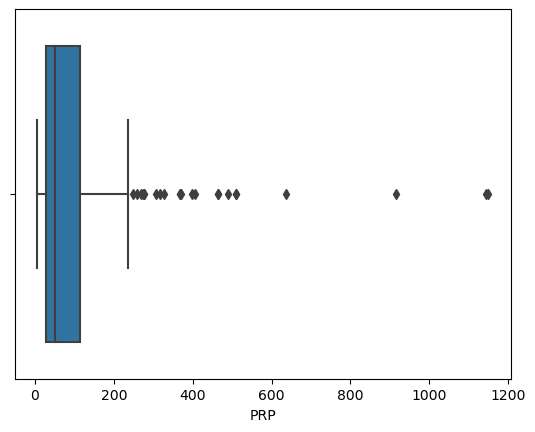

In [168]:
sns.boxplot(data = data, x="PRP")
plt.show()

Lets check how many entries exist with PRP > 500. 

In [169]:
print("No of entries where PRP > 500 :",len(data[data['PRP']>500]))


No of entries where PRP > 500 : 6


Lets Check the summary of the rows for PRP >500. This is to check whether the other column values for PRP > 600 are also higher

In [170]:
data[data['PRP']>600].describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,4.000000,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000
mean,26.500000,16000.000000,64000.0,104.000000,18.000000,112.000000,961.250000,971.000000
std,4.041452,11313.708499,0.0,30.637667,9.521905,75.046652,242.865361,202.752723
min,23.000000,8000.000000,64000.0,64.000000,12.000000,32.000000,636.000000,749.000000
25%,23.000000,8000.000000,64000.0,88.000000,12.000000,56.000000,845.250000,876.500000
50%,26.500000,12000.000000,64000.0,112.000000,14.000000,120.000000,1029.500000,948.500000
75%,30.000000,20000.000000,64000.0,128.000000,20.000000,176.000000,1145.500000,1043.000000
max,30.000000,32000.000000,64000.0,128.000000,32.000000,176.000000,1150.000000,1238.000000


We can observe that most of the outliers in other columns exist for PRP > 600. So lets train the model with these values

### 3. Provide appropriate visualizations to get an insight into the dataset.


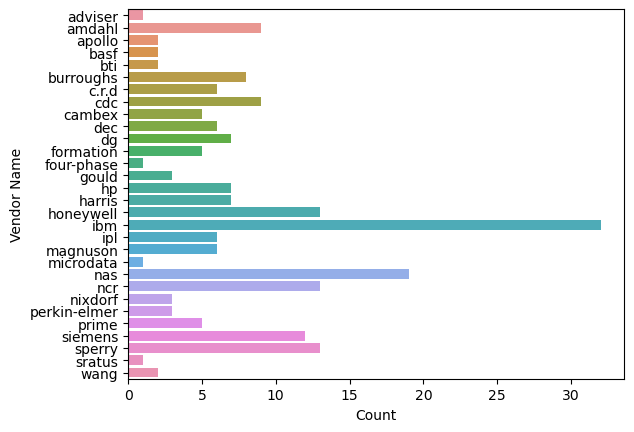

In [171]:
ax = sns.countplot(y='vendor_name', data=data)
ax.set_xlabel('Count')
ax.set_ylabel("Vendor Name")  
plt.show()

### 4. Do the correlational analysis on the dataset. Provide a visualization for the same.Will this correlational analysis have an effect on the feature selection that you willperform in the next step? Justify your answer.

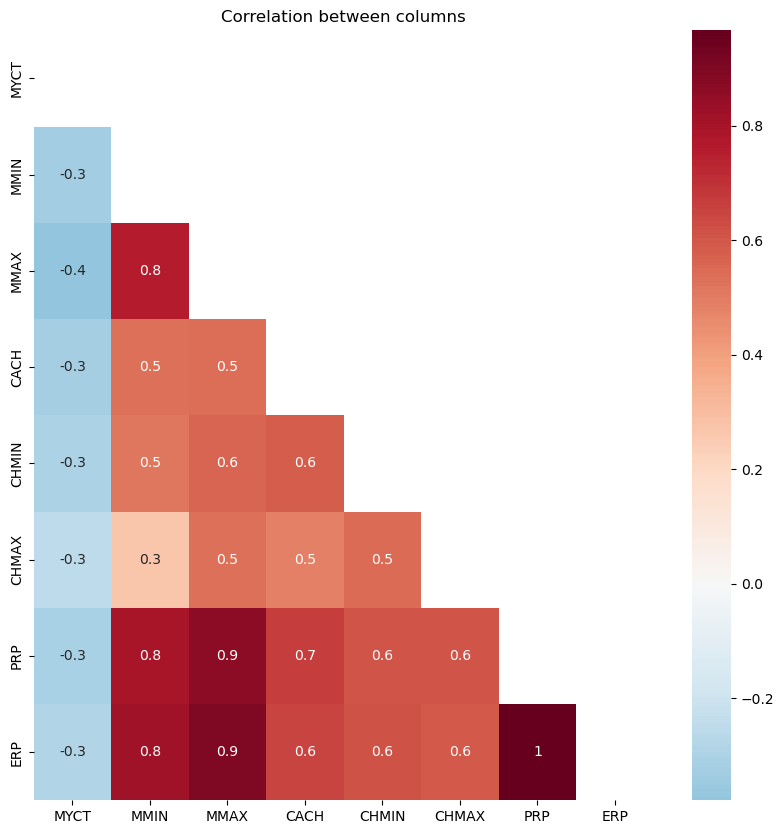

In [172]:
plt.figure(figsize=(10,10))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), cmap='RdBu_r', annot=True, center=0.0, fmt='.1g', mask=matrix)
plt.title('Correlation between columns')
plt.show()


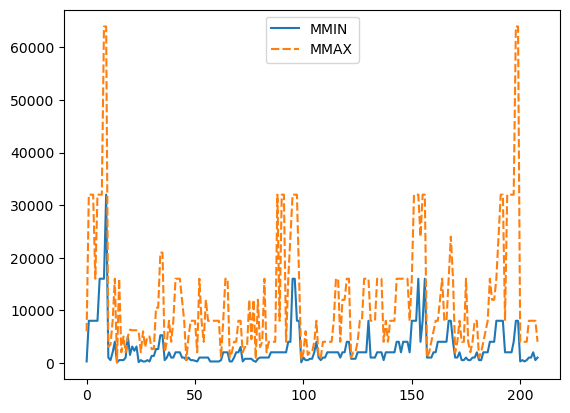

In [173]:

sns.lineplot(data= data[['MMIN', 'MMAX']])
plt.show()

**Inference . Columns MMIN & MMAX have a high positive correlation. So one of the columns can be excluded while training the model .**

# 2 Data Pre-processing and cleaning

### 1.   Do the appropriate pre-processing of the data like identifying NULL or Missing Values, if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore a few latest data balancing tasks and their effect on model evaluation parameters.



#### Find Null Values

In [174]:
data.isnull().sum()

vendor_name    0
Model_Name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

**There are no missing values in the dataset**

#### Find Outliers & TReat Outliers
##### 1. MMIN 

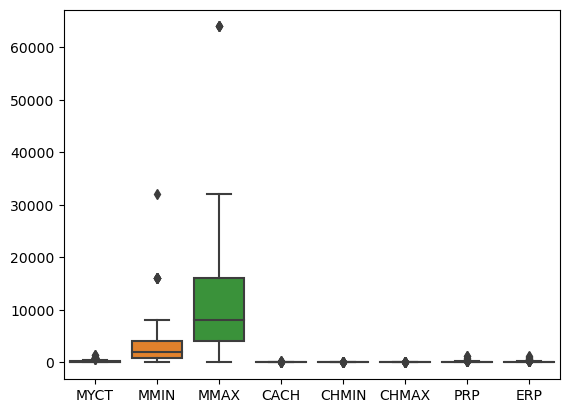

In [175]:
sns.boxplot(data=data)
plt.show()

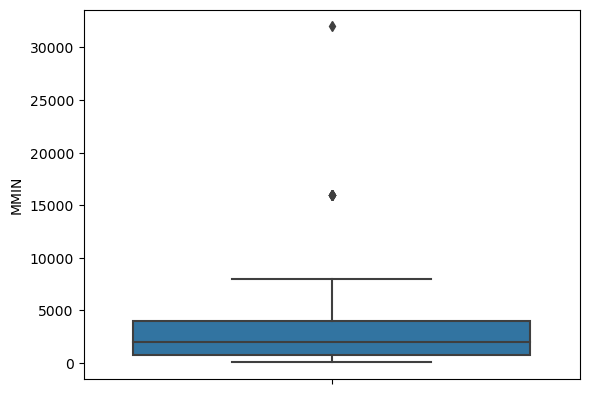

In [176]:
ax = sns.boxplot( y="MMIN", data=data)
plt.show()

It can be clearly seen from the boxplot that there are few points out of the upper whisker. Lets set values to upper whisker value

In [177]:
q1, q3= np.percentile(data['MMIN'],[25,75])
iqr = q3 - q1
upper_bound = q3 +(iqr) 

data['MMIN'] = data['MMIN'].apply(lambda MMIN: upper_bound if (MMIN > upper_bound) else MMIN)


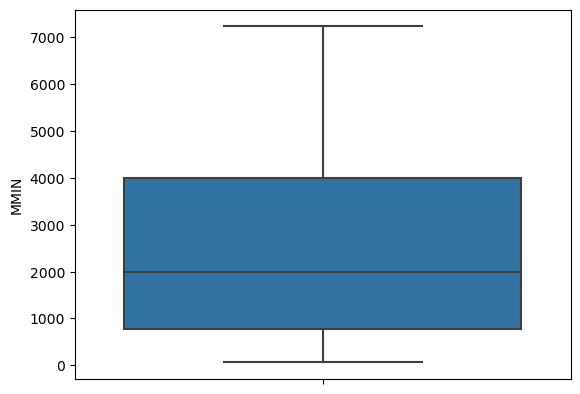

In [178]:
ax = sns.boxplot( y="MMIN", data=data)
plt.show()

##### 2. Find outliers in CACH,CHMIN,CHMAX  columns

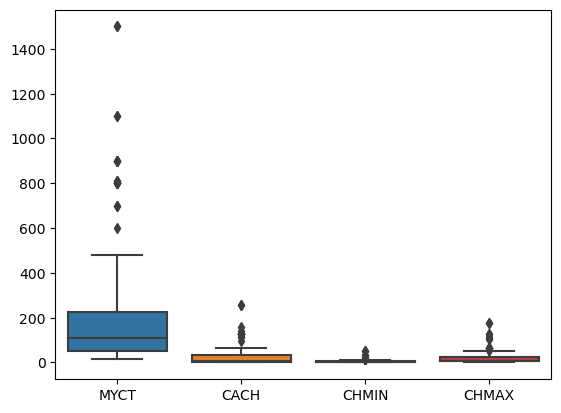

In [179]:
ax = sns.boxplot( data=data[['MYCT','CACH','CHMIN','CHMAX']])
plt.show()

In [180]:
#MYCT

q1, q3= np.percentile(data['MYCT'],[25,75])
iqr = q3 - q1
upper_bound = q3 +(iqr) 

data['MYCT'] = data['MYCT'].apply(lambda MYCT: upper_bound if (MYCT > upper_bound) else MYCT)


#CHMAX
q1, q3= np.percentile(data['CHMAX'],[25,75])
iqr = q3 - q1
upper_bound = q3 +(iqr) 

data['CHMAX'] = data['CHMAX'].apply(lambda CHMAX: upper_bound if (CHMAX > upper_bound) else CHMAX)



#CACH
q1, q3= np.percentile(data['CACH'],[25,75])
iqr = q3 - q1
upper_bound = q3 +(iqr) 

data['CACH'] = data['CACH'].apply(lambda CACH: upper_bound if (CACH > upper_bound) else CACH)

#CHMIN
q1, q3= np.percentile(data['CHMIN'],[25,75])
iqr = q3 - q1
upper_bound = q3 +(iqr) 

data['CHMIN'] = data['CHMIN'].apply(lambda CHMIN: upper_bound if (CHMIN > upper_bound) else CHMIN)

#CHMAX
q1, q3= np.percentile(data['CHMAX'],[25,75])
iqr = q3 - q1
upper_bound = q3 +(iqr) 

data['CHMAX'] = data['CHMAX'].apply(lambda CHMAX: upper_bound if (CHMAX > upper_bound) else CHMAX)


#CHMAX
# q1, q3= np.percentile(data['CHMAX'],[25,75])
# iqr = q3 - q1
# upper_bound = q3 +(iqr) 

# data['CHMAX'] = data['CHMAX'].apply(lambda CHMAX: upper_bound if (CHMAX > upper_bound) else CHMAX)





Now Verify the column values post outlier treatment

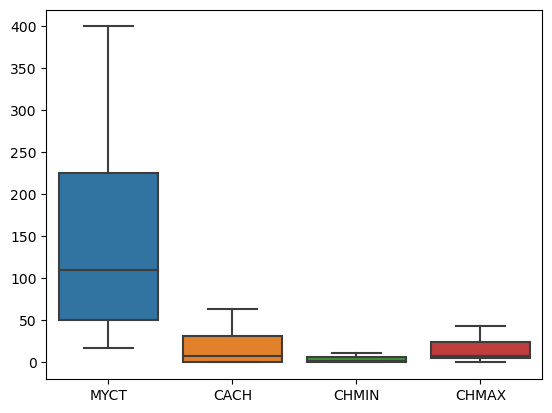

In [181]:
ax = sns.boxplot( data=data[['MYCT','CACH','CHMIN','CHMAX']])
plt.show()

### 2. Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You can apply the appropriate transformations depending on your dataset’s structure and complexity. Provide proper justification. Techniques used without justification will not be awarded marks. Explore a few techniques for identifying feature importance for your feature engineering task.

#### Feature transformations. Doing the One hot encoding of the following features 

1.   Vendor Name
2.   Model Name


In [182]:

labelencoder = LabelEncoder()
data['vendor_name_en'] = labelencoder.fit_transform(data['vendor_name'])
data.head()

data['model_name_en'] = labelencoder.fit_transform(data['Model_Name'])
data.head()

,vendor_name,Model_Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP,vendor_name_en,model_name_en
0,adviser,32/60,125.0,256.0,6000,64.0,11.0,43.0,198,199,0,29
1,amdahl,470v/7,29.0,7232.0,32000,32.0,8.0,32.0,269,253,1,62
2,amdahl,470v/7a,29.0,7232.0,32000,32.0,8.0,32.0,220,253,1,63
3,amdahl,470v/7b,29.0,7232.0,32000,32.0,8.0,32.0,172,253,1,64
4,amdahl,470v/7c,29.0,7232.0,16000,32.0,8.0,16.0,132,132,1,65


**Since the Vendor name and Model name are non predictive columns, these require no further actions. These are not included in the model training process**

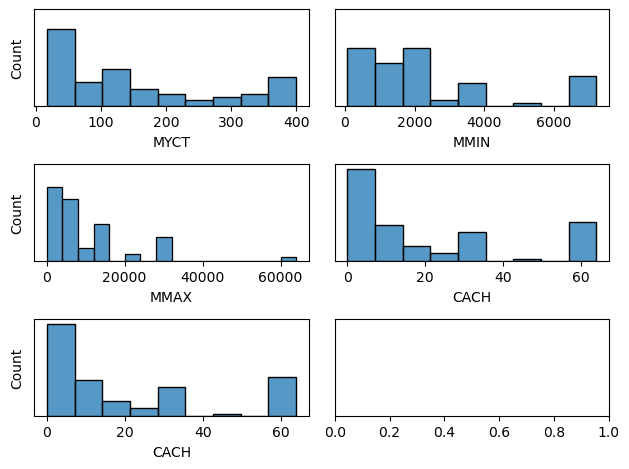

In [183]:

fig, ax =plt.subplots(3,2, sharey=True)
sns.histplot(data["MYCT"], ax=ax[0, 0])
sns.histplot(data["MMIN"], ax=ax[0, 1])
sns.histplot(data["MMAX"], ax=ax[1, 0])
sns.histplot(data["CACH"], ax=ax[1, 1])
sns.histplot(data["CACH"], ax=ax[2, 0])
plt.setp(ax, yticks=[])
plt.tight_layout()
plt.show()



This shows the distribution of the data in the column s

##### ***Normalization***

**Machine learning algorithms like linear regression, logistic regression,  etc. that use gradient descent as an optimization technique require data to be scaled. So lets try the MIX Max scaling **

In [184]:
scaler = MinMaxScaler()
data["MYCT"] = scaler.fit_transform(data["MYCT"].values.reshape(-1,1))
data["MMIN"] = scaler.fit_transform(data["MMIN"].values.reshape(-1,1))
data["MMAX"] = scaler.fit_transform(data["MMAX"].values.reshape(-1,1))
data["CACH"] = scaler.fit_transform(data["CACH"].values.reshape(-1,1))
data["CHMIN"] = scaler.fit_transform(data["CHMIN"].values.reshape(-1,1))
data["CHMAX"] = scaler.fit_transform(data["CHMAX"].values.reshape(-1,1))

Lets check the column values after normalisation

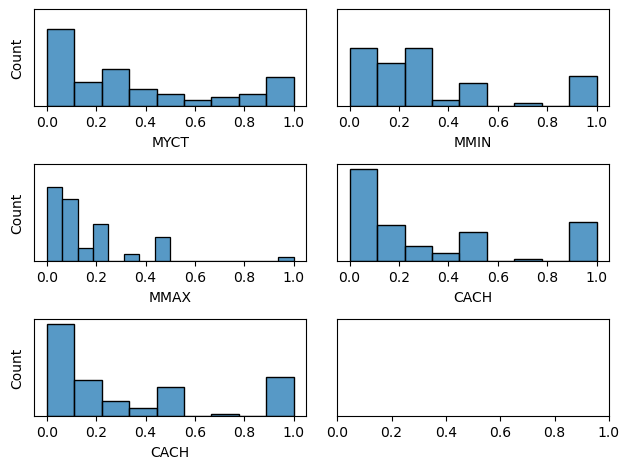

In [185]:

fig, ax =plt.subplots(3,2, sharey=True)
sns.histplot(data["MYCT"], ax=ax[0, 0])
sns.histplot(data["MMIN"], ax=ax[0, 1])
sns.histplot(data["MMAX"], ax=ax[1, 0])
sns.histplot(data["CACH"], ax=ax[1, 1])
sns.histplot(data["CACH"], ax=ax[2, 0])
plt.setp(ax, yticks=[])
plt.tight_layout()
plt.show()

# 3. Model Building

## 3.1 Split the dataset into training and test sets.

In [186]:

features = ['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']  # 6 feaures are used here. Model name and vendor name are not used
target = ['PRP']

X = data[features]
y = data[target]
print ("features set")

features set


### Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20% .
In this case we make sure that more data is awailable for the model training which can lead to better predictive power of the model 


In [187]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle=True)
print("train test split done")

train test split done


Generally its a good practice to divide the data provided to split into train and test sets. Train data can be used to train the model and test data can be used to test the model. 
Train & test set can be set to 70-30 or 80 -20.

#### 3.3 Build Model/s using 1) Linear Regression

In [188]:
# Fitting Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred[10]

from sklearn import metrics

print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

print('Mean Absolute Error: \t', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Square Error: \t', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

from sklearn.metrics import r2_score
print('RSquare: \t', r2_score(y_test,y_pred))

Coefficients: 
 [[ 61.9672128   -0.98144775 520.5835242   87.15836992  94.39033513
   15.98785561]]
Intercept: 
 [-77.41659413]
Mean Absolute Error: 	 64.48700869069825
Root Mean Square Error: 	 107.1097517871854
RSquare: 	 0.7746374365635321


**R Square** represents how well the model predicts the ouput based on the input features. R square value of  ~0.77 to .80 indictates that the model is able to learn and predict from the given features

**Root Mean Square Error** represents the differences between actual and predicted others. 

Both **R Square & Root Mean Square Error ** can be consirdered to evaluate the model. So this version of the model is better suited model. 



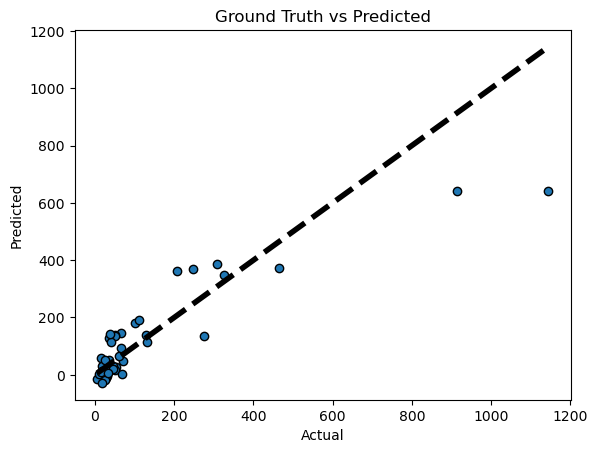

In [189]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

This plot depicts relationship between actual and the predicted ERP (Straigt line) values.



**********************
Linear Regression Feature Importance
**********************


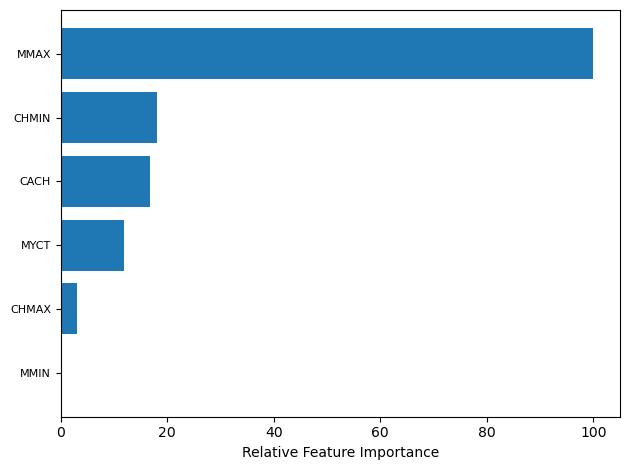

In [190]:

print('**********************')
print("Linear Regression Feature Importance")
print('**********************')
feature_importance = abs(regressor.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

this plot show the feature importance of the columns. columns MMAX and CHMIN, CACH are having the most innfluence on the model 



### Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ;[ x_test2,y_test2] = 90%

In this case there is very few data are the model training points which can lead to a biased model. 

In [191]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state = 0)
print("train test split done")

train test split done


#### 3.3 Build Model/s using 1) Linear Regression

In [192]:
# Fitting Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X_train, y_train)
# Predicting the Test set results
y_pred_2 = regressor2.predict(X_test)


from sklearn import metrics

print('Coefficients: \n', regressor2.coef_)
print('Intercept: \n', regressor2.intercept_)

# Predicting the Test set results
y_pred_2 = regressor2.predict(X_test)


print('Mean Absolute Error: \t', metrics.mean_absolute_error(y_test,y_pred_2))
print('Root Mean Square Error: \t', np.sqrt(metrics.mean_squared_error(y_test,y_pred_2)))

from sklearn.metrics import r2_score
print('RSquare: \t', r2_score(y_test,y_pred_2))

Coefficients: 
 [[ -48.06098828  281.61374622  908.5321535  -119.42077615  126.30000234
  -224.52186442]]
Intercept: 
 [-33.42828292]
Mean Absolute Error: 	 106.35854580382544
Root Mean Square Error: 	 144.17628122858784
RSquare: 	 -0.14873903916158948


**R Square values of - 0.14** shows that the model has not learned from the less data provided. -Ve R Square shows that the that a simple horizontal line has a better predictive power that the model. 

**Root Mean Square Error: 	 144.17** show that there are too many errors in the actual vs predictions. 

**SO this model should not be considered for usage**

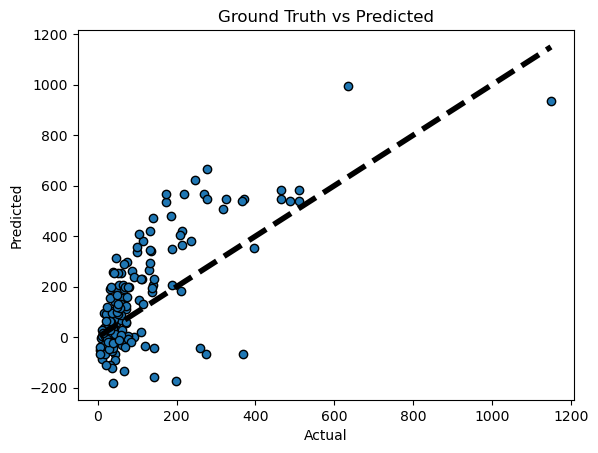

In [193]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_2, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

This plot depicts there is a bigger deviation between the actual and the predicted values. 

## 3.2 2. Explore k-fold cross-validation.

Cross validation is a technique used to reduce model overfitting. Here the data set is divided to multiple splits. 

In [194]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor, X_train, y_train,  scoring='r2', cv=5)
scores      


array([  0.98341205, -25.74852369, -23.35372967,   0.84532443,
        -0.35602959])

**Here** we can observe that the R Square values ranges from -0.35 to .98. Since this is a very small data set this could happen.

**Lasso Regression**

In [195]:

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
# Predicting the Test set results
y_pred_lasso= lasso.predict(X_test)

from sklearn import metrics

print('Coefficients: \n', lasso.coef_)
print('Intercept: \n', lasso.intercept_)

# Predicting the Test set results
y_pred_lasso= lasso.predict(X_test)


print('Mean Absolute Error: \t', metrics.mean_absolute_error(y_test,y_pred_lasso))
print('Root Mean Square Error: \t', np.sqrt(metrics.mean_squared_error(y_test,y_pred_lasso)))

from sklearn.metrics import r2_score
print('RSquare: \t', r2_score(y_test,y_pred_lasso)) 

Coefficients: 
 [  -6.34218706  287.56481409  826.05183211  -81.40007197   58.93053104
 -108.244384  ]
Intercept: 
 [-65.32207421]
Mean Absolute Error: 	 90.11900738600595
Root Mean Square Error: 	 125.91143207502597
RSquare: 	 0.12387904365928637


# 4. Performance Evaluation

List out the performance measures in a tabular format. (Mean Absolute Error,Root Mean Square Error,RSquare)

<table> 
  <tr> 
  <th>Model Version</th>
    <th>Model</th>
  <th>Model Description</th>
  <th>Train - Test split </th>
  <th>Mean Absolute Error</th> 
  <th>Root Mean Square Error</th> 
  <th>RSquare</th>
  </tr> 
  <tr>
  <td>1</td> 
 <td>Linear Regression </td>
 <td> Without Outlier Treatment & Normalisation</td> 
   <td>80 - 20</td> 
  <td>57.51</td> 
 <td>98.92</td> 
 <td>0.80</td> 
 </tr> 
   <tr>
  <td>2</td> 
 <td>Linear Regression </td>
 <td> With Outlier Treatment & Normalisation</td> 
   <td>80 - 20</td> 
  <td>64.48</td> 
 <td>107.109</td> 
 <td>0.77</td> 
 </tr> 
  </tr> 
   <tr>
  <td>3</td> 
 <td>Linear Regression </td>
 <td> With Outlier Treatment & Normalisation</td> 
   <td>10 -90</td> 
  <td>106</td> 
 <td>144</td> 
 <td>-0.14</td> 
 </tr> 
    <tr>
  <td>4</td> 
 <td>Lasso Regression </td>
 <td> With Outlier Treatment & Normalisation</td> 
   <td>80-20</td> 
  <td>90</td> 
 <td>125</td> 
 <td>0.123</td> 
 </tr> 
</table>

Mean Absolute Error: 	 90.11900738600595
Root Mean Square Error: 	 125.911432075026
RSquare: 	 0.12387904365928604

**Inference**



1.   Model 1 without outlier treatment and normalisation has a better predictive power with RSquare .8 and less RMSE score when compared to the other model versions. So this model can be used for the production deployment
2.   In Model 2, after doing the outlier treatment and Normalisation the Rsquare and RMSE values has decreased
3.   In Model 3, the RSquare is very less. and RMSE square is very high. so this model should be *ignored*

